In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import itertools

In [2]:
path_dir_dataset = './dataset'
npz = path_dir_dataset + '/extracao_efficientnetb7.npz' 
data = np.load(npz)

In [3]:
X_train = data['X_train']
y_train = data['y_train']
X_test =  data['X_test']
y_test = data['y_test']

In [4]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [5]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

In [6]:
np.save('./resultados/pred_proba_efficientnet_lr.npy', y_pred_proba)

In [7]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.8259264188484077

In [8]:
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.4f}".format(acc))

Acurácia: 0.7143


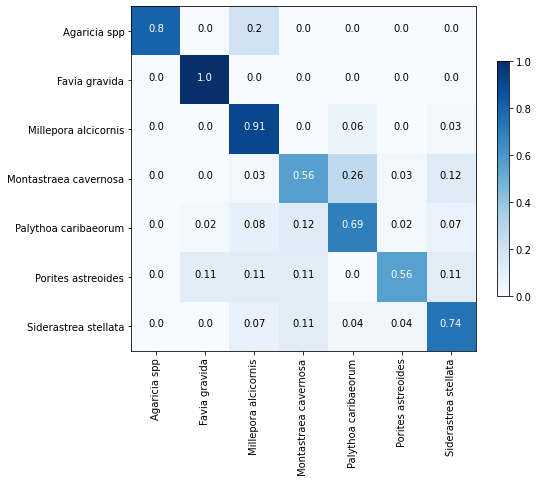

In [15]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
      cm (array, shape = [n, n]): a confusion matrix of integer classes
      class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title("Confusion matrix")
    plt.colorbar(shrink=0.5)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm, decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    return figure

class_names = ['Agaricia spp', 'Favia gravida', 'Millepora alcicornis', 'Montastraea cavernosa', 'Palythoa caribaeorum', 'Porites astreoides', 'Siderastrea stellata']

# Calculate the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm,class_names)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.33      1.00      0.50         1
           2       0.75      0.91      0.82        33
           3       0.63      0.56      0.59        34
           4       0.77      0.69      0.73        59
           5       0.62      0.56      0.59         9
           6       0.67      0.74      0.70        27

    accuracy                           0.71       168
   macro avg       0.68      0.75      0.69       168
weighted avg       0.72      0.71      0.71       168



In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [12]:
print(f1_score(y_test, y_pred, average='macro'))
print(matthews_corrcoef(y_test, y_pred))

0.689527033476212
0.632662792735288


In [13]:
from joblib import dump
dump(model, './model/lr.joblib')

['./model/lr.joblib']